# **Importando as Bibliotecas necessarias para realização da questão**

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


# Letra a)

Erro médio de treinamento: 83310354432.0
Erro médio de validação: 79739125760.0
313/313 [==============================] - 0s 1ms/step


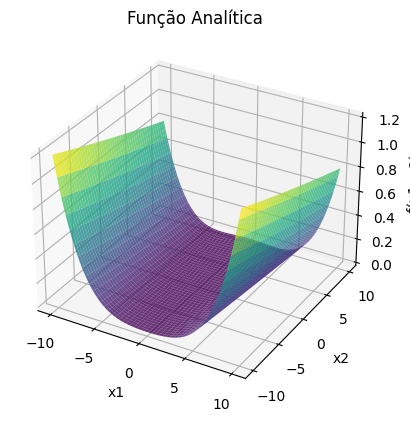

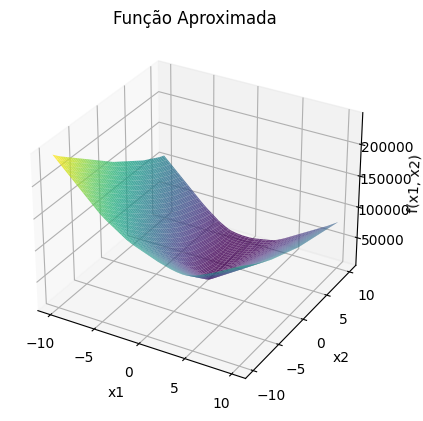

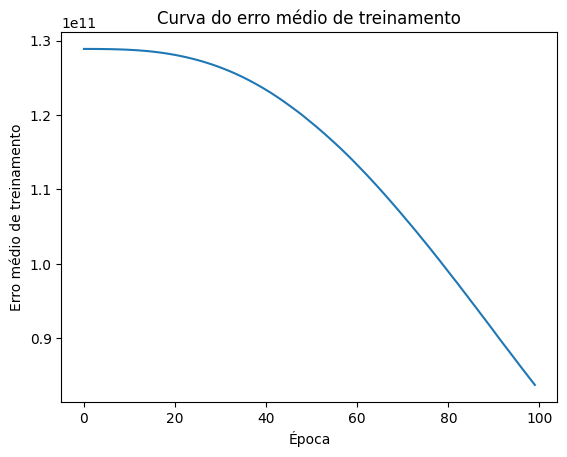

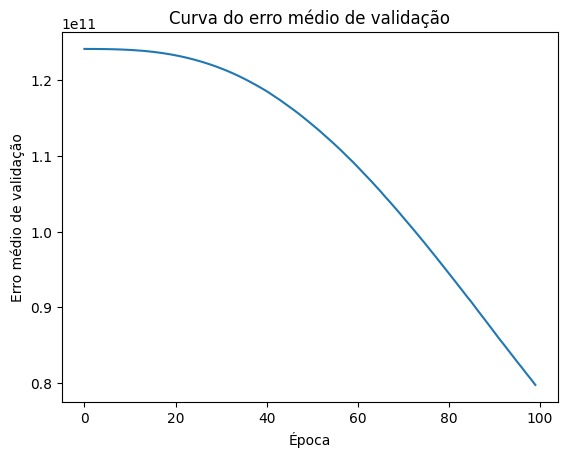

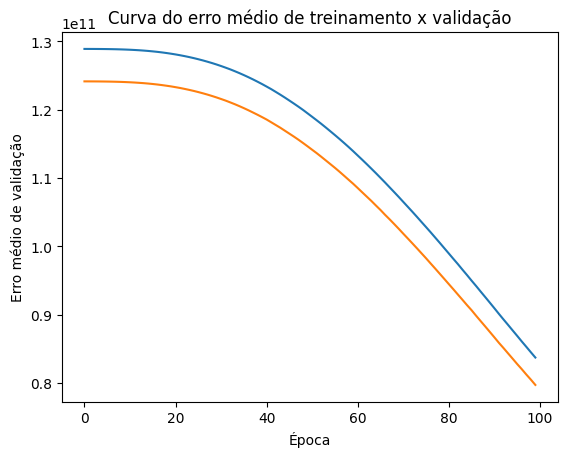

In [41]:
# Função alvo: f(x1,x2) = (1 - x1^2) + 100 * ((x2 - x1^2)^2)
def f(x1, x2):
    return (1 - x1**2) + 100*((x2- (x1**2))**2)

# Gerar dados de treinamento e validação
np.random.seed(0)
n_samples = 1000
x_train = np.random.uniform(low=-10, high=10, size=(n_samples, 2))
y_train = f(x_train[:, 0], x_train[:, 1])
x_val = np.random.uniform(low=-10, high=10, size=(n_samples, 2))
y_val = f(x_val[:, 0], x_val[:, 1])

# Definir a arquitetura da rede neural
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=2))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar a rede neural
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, verbose=0)

# Avaliar a rede neural nos dados de treinamento e validação
train_loss = model.evaluate(x_train, y_train, verbose=0)
val_loss = model.evaluate(x_val, y_val, verbose=0)
print("Erro médio de treinamento:", train_loss)
print("Erro médio de validação:", val_loss)

# Calcular as previsões da rede neural para plotar as curvas
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.flatten(), X2.flatten()))
y_pred = model.predict(X).reshape(X1.shape)

# Plotar a curva da função analítica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, f(X1, X2), cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Função Analítica')

# Plotar a curva da função aproximada pela rede neural
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_pred, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Função Aproximada')

# Plotar a curva do erro médio de treinamento
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('Época')
plt.ylabel('Erro médio de treinamento')
plt.title('Curva do erro médio de treinamento')

# Plotar a curva do erro médio de validação
plt.figure()
plt.plot(history.history['val_loss'])
plt.xlabel('Época')
plt.ylabel('Erro médio de validação')
plt.title('Curva do erro médio de validação')

# Plotando ambas curvas juntas para comparação
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('Época')
plt.ylabel('Erro médio de treinamento')
plt.plot(history.history['val_loss'])
plt.xlabel('Época')
plt.ylabel('Erro médio de validação')
plt.title('Curva do erro médio de treinamento x validação')

# Exibir os gráficos
plt.show()


# Letra b)

32/32 [==============================] - 0s 1ms/step - loss: 8.8838e-04
Erro médio de treinamento: 0.000907769484911114
Erro médio de validação: 0.0008883795235306025
313/313 [==============================] - 0s 1ms/step


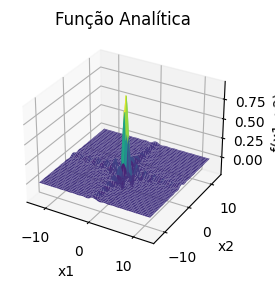

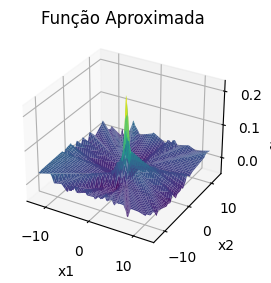

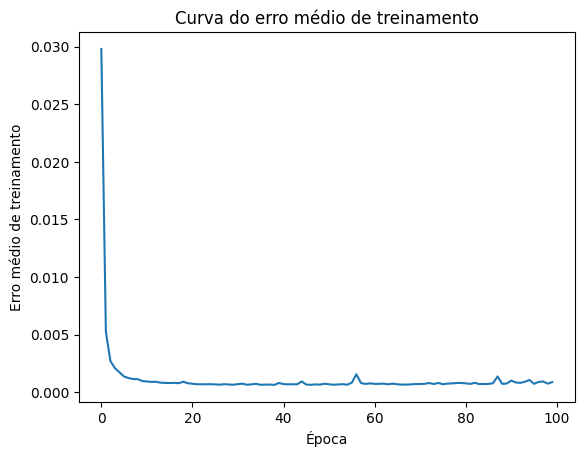

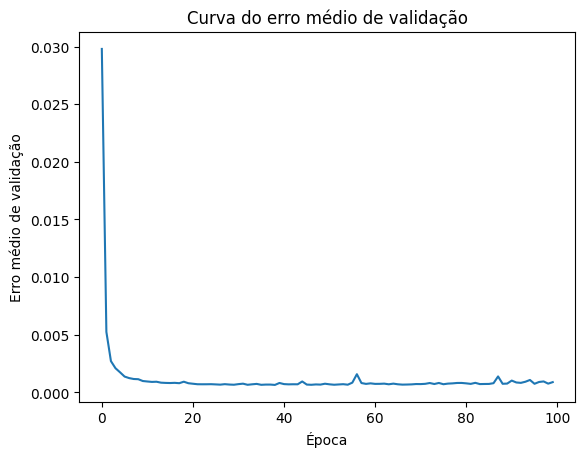

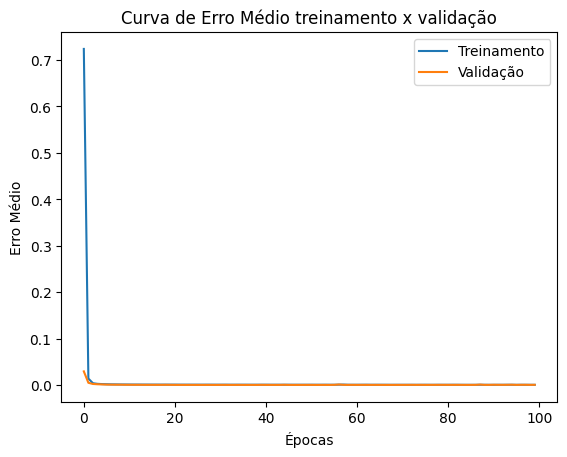

In [47]:

# Definindo a função a ser aproximada
def target_function(x1, x2):
    return (np.sin(np.pi*x1)/(np.pi*x1)) * (np.sin(np.pi*x2)/(np.pi*x2))

# Gerando dados para treinamento e validação
np.random.seed(0)
num_samples = 1000
x1_train = np.random.uniform(-4*np.pi, 4*np.pi, num_samples)
x2_train = np.random.uniform(-4*np.pi, 4*np.pi, num_samples)
y_train = target_function(x1_train, x2_train)
x1_val = np.random.uniform(-4*np.pi, 4*np.pi, num_samples)
x2_val = np.random.uniform(-4*np.pi, 4*np.pi, num_samples)
y_val = target_function(x1_val, x2_val)


# Definindo a arquitetura da rede neural
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))



# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando a rede neural
history = model.fit(
    np.column_stack((x1_train, x2_train)), y_train,
    validation_data=(np.column_stack((x1_val, x2_val)), y_val),
    epochs=100, batch_size=32, verbose=0
)


# Avaliando o modelo nos dados de treinamento e validação
train_loss = model.evaluate(np.column_stack((x1_train, x2_train)), y_train)
val_loss = model.evaluate(np.column_stack((x1_val, x2_val)), y_val)
print("Erro médio de treinamento:", train_loss)
print("Erro médio de validação:", val_loss)


# Gerando os pontos para o gráfico
num_points = 100
x1 = np.linspace(-4*np.pi, 4*np.pi, num_points)
x2 = np.linspace(-4*np.pi, 4*np.pi, num_points)
X1, X2 = np.meshgrid(x1, x2)
Z_target = target_function(X1, X2)
Z_approx = model.predict(np.column_stack((X1.flatten(), X2.flatten()))).reshape(num_points, num_points)


# Plotar a curva da função analítica
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X1, X2, Z_target, cmap='viridis')
ax1.set_title("Função Analítica")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("f(x1, x2)")

# Plotar a curva da função aproximada pela rede neural
fig = plt.figure()
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1, X2, Z_approx, cmap='viridis')
ax2.set_title("Função Aproximada")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("f(x1, x2)")

# Plotar a curva do erro médio de treinamento
plt.figure()
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Erro médio de treinamento')
plt.title('Curva do erro médio de treinamento')


# Plotar a curva do erro médio de validação
plt.figure()
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Erro médio de validação')
plt.title('Curva do erro médio de validação')


# Plotando ambas curvas juntas para comparação
fig = plt.figure()
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Erro Médio treinamento x validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()
plt.show()


plt.show()
